## 주가이동평균선을 이용/단순보유전략 백테스팅

In [ ]:
# 1. 데이터 가져오기
# 먼저, pykrx를 사용하여 코스닥 기업의 주가 데이터를 가져옵니다.

# 2. 이동평균선 계산
# 단기 이동평균선과 장기 이동평균선을 계산합니다.

# 3. 매매 시그널 생성
# 단기 이동평균선이 장기 이동평균선을 상향 돌파하면 매수, 하향 돌파하면 매도 시그널을 생성합니다.

# 4. 백테스팅 수행
# 크로스 매매 전략과 단순 보유 전략의 성과를 백테스팅합니다.

In [ ]:
# 삼성전자 2015~2023

C:\Users\JYB\AppData\Local\Temp/ipykernel_13088/3490858805.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
C:\Users\JYB\A

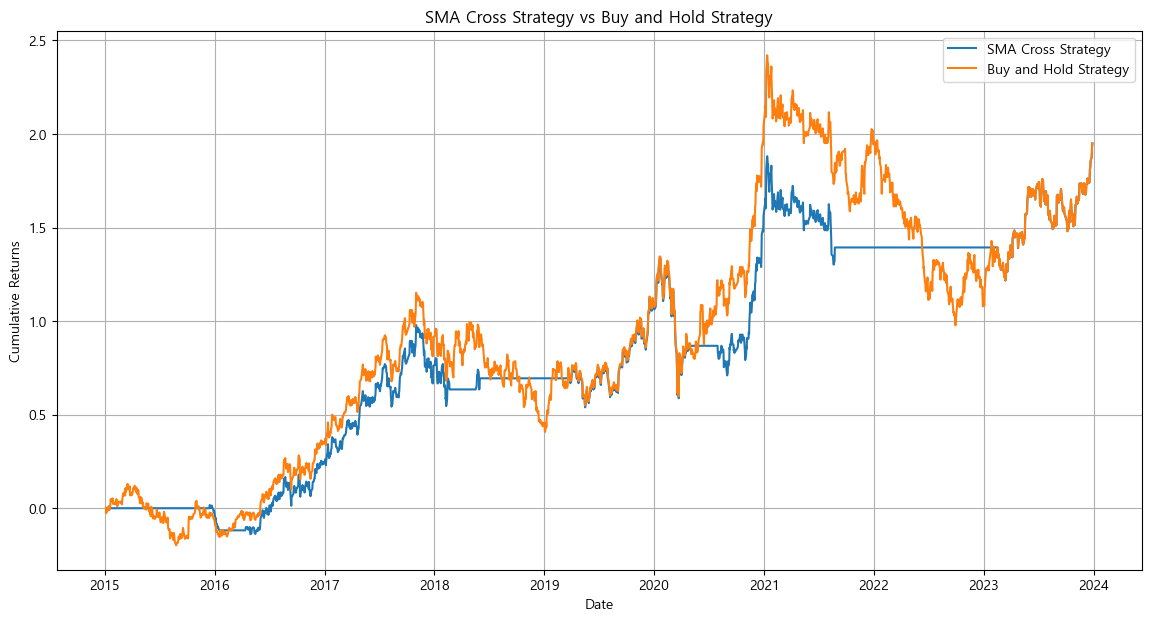

SMA Cross Strategy Cumulative Return: 1.95
Buy and Hold Strategy Cumulative Return: 1.95


In [6]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt

# 주식 데이터 다운로드 함수 (pykrx 사용)
def download_stock_data(ticker, start_date, end_date):
    # 날짜 형식을 '%Y%m%d'로 변경
    start_date = start_date.replace("-", "")
    end_date = end_date.replace("-", "")
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    df['Return'] = df['종가'].pct_change()
    return df

# 이동평균선 계산 함수
def calculate_moving_averages(data, short_window, long_window):
    data['SMA_short'] = data['종가'].rolling(window=short_window).mean()
    data['SMA_long'] = data['종가'].rolling(window=long_window).mean()
    return data

# 매매 시그널 생성 함수
def generate_signals(data):
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# 백테스팅 수행 함수
def backtest_strategy(data):
    data['Portfolio'] = data['종가'].pct_change() * data['Signal'].shift(1)
    data['Portfolio'] = (data['Portfolio'] + 1).cumprod() - 1
    return data

# 주식 데이터 다운로드
ticker = "005930"  # 삼성전자 티커
start_date = "20150101"
end_date = "20231231"
stock_data = download_stock_data(ticker, start_date, end_date)

# 이동평균선 계산
short_window = 50
long_window = 200
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# 매매 시그널 생성
stock_data = generate_signals(stock_data)

# 백테스팅 수행
stock_data = backtest_strategy(stock_data)

# 단순 보유 전략 계산
stock_data['BuyHold'] = (stock_data['종가'].pct_change() + 1).cumprod() - 1

# 결과 출력
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Portfolio'], label='SMA Cross Strategy')
plt.plot(stock_data.index, stock_data['BuyHold'], label='Buy and Hold Strategy')
plt.legend(loc='best')
plt.title('SMA Cross Strategy vs Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

# 백테스트 기간 동안의 누적 수익률 계산
cumulative_return_sma = stock_data['Portfolio'].iloc[-1]
cumulative_return_buy_hold = stock_data['BuyHold'].iloc[-1]

print(f"SMA Cross Strategy Cumulative Return: {cumulative_return_sma:.2f}")
print(f"Buy and Hold Strategy Cumulative Return: {cumulative_return_buy_hold:.2f}")


## 이동평균선을 5일과 20일로 설정하여 매매 전략을 구현

C:\Users\JYB\AppData\Local\Temp/ipykernel_13088/1831256676.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
C:\Users\JYB\A

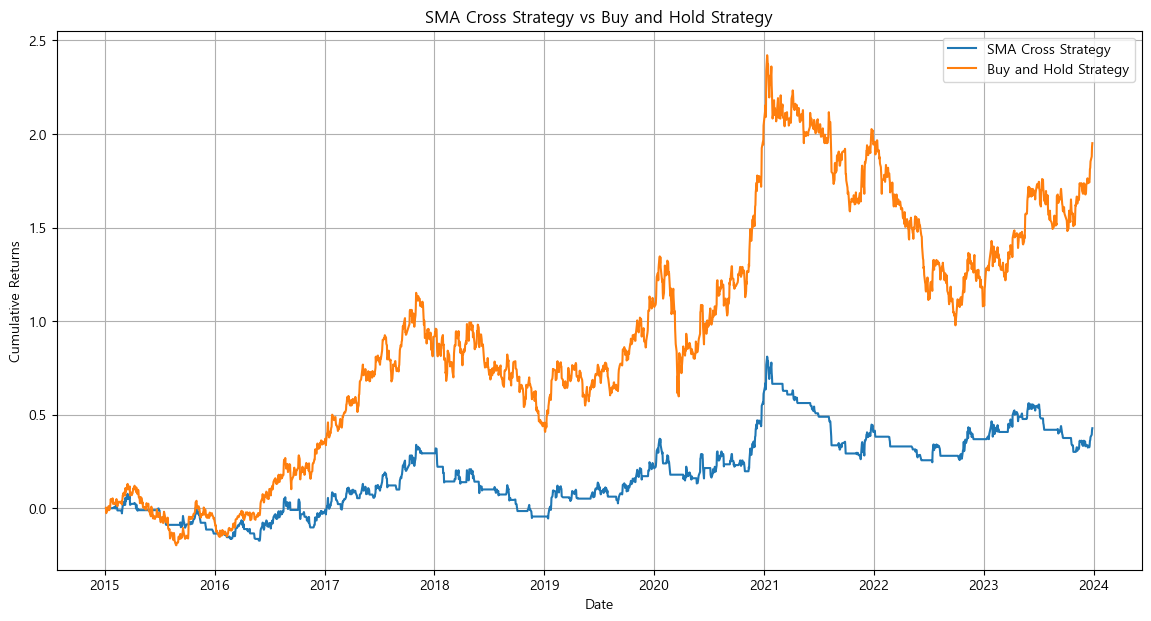

SMA Cross Strategy Cumulative Return: 0.43
Buy and Hold Strategy Cumulative Return: 1.95
SMA Cross Strategy Annualized Return: 0.04
Buy and Hold Strategy Annualized Return: 0.13


In [3]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt

# 주식 데이터 다운로드 함수 (pykrx 사용)
def download_stock_data(ticker, start_date, end_date):
    # 날짜 형식을 '%Y%m%d'로 변경
    start_date = start_date.replace("-", "")
    end_date = end_date.replace("-", "")
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    df['Return'] = df['종가'].pct_change()
    return df

# 이동평균선 계산 함수
def calculate_moving_averages(data, short_window, long_window):
    data['SMA_short'] = data['종가'].rolling(window=short_window).mean()
    data['SMA_long'] = data['종가'].rolling(window=long_window).mean()
    return data

# 매매 시그널 생성 함수
def generate_signals(data):
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# 백테스팅 수행 함수
def backtest_strategy(data):
    data['Portfolio'] = data['종가'].pct_change() * data['Signal'].shift(1)
    data['Portfolio'] = (data['Portfolio'] + 1).cumprod() - 1
    return data

# 주식 데이터 다운로드
ticker = "005930"  # 삼성전자 티커
start_date = "20150101"
end_date = "20231231"
stock_data = download_stock_data(ticker, start_date, end_date)

# 이동평균선 계산
short_window = 5
long_window = 20
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# 매매 시그널 생성
stock_data = generate_signals(stock_data)

# 백테스팅 수행
stock_data = backtest_strategy(stock_data)

# 단순 보유 전략 계산
stock_data['BuyHold'] = (stock_data['종가'].pct_change() + 1).cumprod() - 1

# 연환산 수익률 계산 함수
def annualized_return(total_return, periods):
    annualized_ret = (1 + total_return) ** (252 / periods) - 1
    return annualized_ret

# 연환산 수익률 계산
cumulative_return_sma = stock_data['Portfolio'].iloc[-1]
cumulative_return_buy_hold = stock_data['BuyHold'].iloc[-1]

annualized_return_sma = annualized_return(cumulative_return_sma, len(stock_data))
annualized_return_buy_hold = annualized_return(cumulative_return_buy_hold, len(stock_data))

# 결과 출력
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Portfolio'], label='SMA Cross Strategy')
plt.plot(stock_data.index, stock_data['BuyHold'], label='Buy and Hold Strategy')
plt.legend(loc='best')
plt.title('SMA Cross Strategy vs Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

print(f"SMA Cross Strategy Cumulative Return: {cumulative_return_sma:.2f}")
print(f"Buy and Hold Strategy Cumulative Return: {cumulative_return_buy_hold:.2f}")
print(f"SMA Cross Strategy Annualized Return: {annualized_return_sma:.2f}")
print(f"Buy and Hold Strategy Annualized Return: {annualized_return_buy_hold:.2f}")


## 기간 : 2020~2023

C:\Users\JYB\AppData\Local\Temp/ipykernel_13088/803472878.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
C:\Users\JYB\Ap

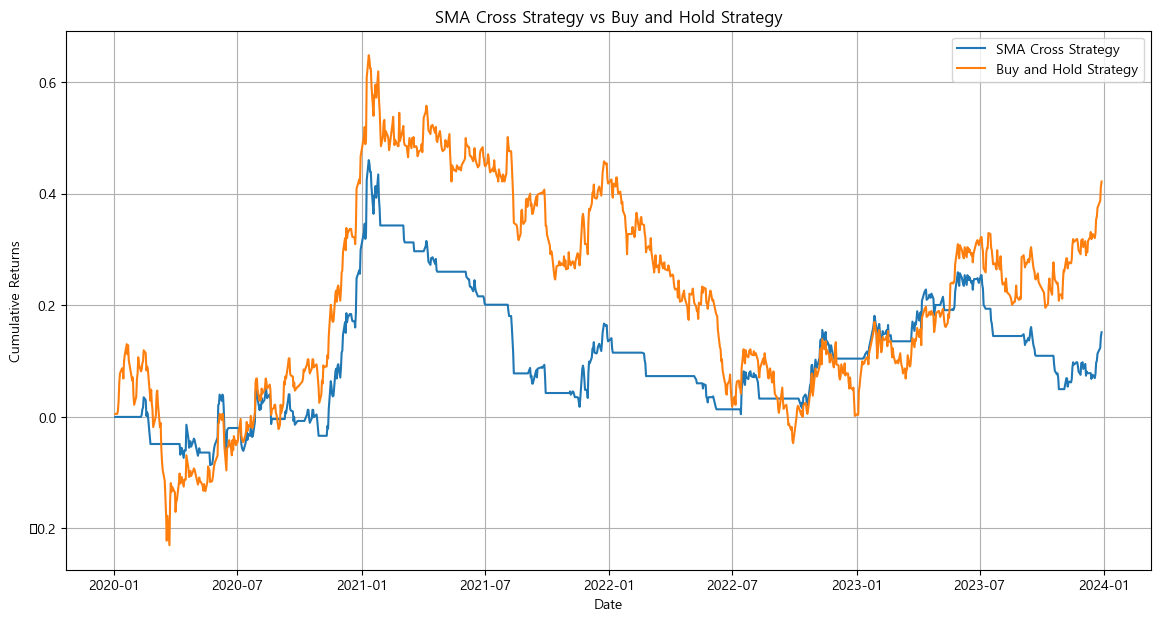

SMA Cross Strategy Cumulative Return: 0.15
Buy and Hold Strategy Cumulative Return: 0.42
SMA Cross Strategy Annualized Return: 0.04
Buy and Hold Strategy Annualized Return: 0.09


In [4]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt

# 주식 데이터 다운로드 함수 (pykrx 사용)
def download_stock_data(ticker, start_date, end_date):
    # 날짜 형식을 '%Y%m%d'로 변경
    start_date = start_date.replace("-", "")
    end_date = end_date.replace("-", "")
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    df['Return'] = df['종가'].pct_change()
    return df

# 이동평균선 계산 함수
def calculate_moving_averages(data, short_window, long_window):
    data['SMA_short'] = data['종가'].rolling(window=short_window).mean()
    data['SMA_long'] = data['종가'].rolling(window=long_window).mean()
    return data

# 매매 시그널 생성 함수
def generate_signals(data):
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# 백테스팅 수행 함수
def backtest_strategy(data):
    data['Portfolio'] = data['종가'].pct_change() * data['Signal'].shift(1)
    data['Portfolio'] = (data['Portfolio'] + 1).cumprod() - 1
    return data

# 주식 데이터 다운로드
ticker = "005930"  # 삼성전자 티커
start_date = "20200101"
end_date = "20231231"
stock_data = download_stock_data(ticker, start_date, end_date)

# 이동평균선 계산
short_window = 5
long_window = 20
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# 매매 시그널 생성
stock_data = generate_signals(stock_data)

# 백테스팅 수행
stock_data = backtest_strategy(stock_data)

# 단순 보유 전략 계산
stock_data['BuyHold'] = (stock_data['종가'].pct_change() + 1).cumprod() - 1

# 연환산 수익률 계산 함수
def annualized_return(total_return, periods):
    annualized_ret = (1 + total_return) ** (252 / periods) - 1
    return annualized_ret

# 연환산 수익률 계산
cumulative_return_sma = stock_data['Portfolio'].iloc[-1]
cumulative_return_buy_hold = stock_data['BuyHold'].iloc[-1]

annualized_return_sma = annualized_return(cumulative_return_sma, len(stock_data))
annualized_return_buy_hold = annualized_return(cumulative_return_buy_hold, len(stock_data))

# 결과 출력
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Portfolio'], label='SMA Cross Strategy')
plt.plot(stock_data.index, stock_data['BuyHold'], label='Buy and Hold Strategy')
plt.legend(loc='best')
plt.title('SMA Cross Strategy vs Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

print(f"SMA Cross Strategy Cumulative Return: {cumulative_return_sma:.2f}")
print(f"Buy and Hold Strategy Cumulative Return: {cumulative_return_buy_hold:.2f}")
print(f"SMA Cross Strategy Annualized Return: {annualized_return_sma:.2f}")
print(f"Buy and Hold Strategy Annualized Return: {annualized_return_buy_hold:.2f}")


## 저 per

In [ ]:
# 저PER 종목 10개 찾기
# 각 종목의 주가 데이터를 가져오기
# 이동평균선 크로스 매매 전략과 단순 보유 전략을 백테스팅하기

In [ ]:
# pykrx를 사용하여 저PER 종목 10개를 찾습니다.
# 각 종목의 주가 데이터를 다운로드하고, 이동평균선을 계산하고, 매매 시그널을 생성합니다.
# 각 종목에 대해 이동평균선 크로스 매매 전략과 단순 보유 전략을 백테스팅합니다.
# 각 전략의 연환산 수익률을 계산하고 평균을 출력합니다.

In [8]:
import pandas as pd
import numpy as np
from pykrx import stock
import matplotlib.pyplot as plt

# 저PER 종목 10개 찾기
def get_low_per_stocks(date, num_stocks=10):
    # KOSPI 전체 종목의 PER 데이터 가져오기
    tickers = stock.get_market_ticker_list(market="KOSPI", date=date)
    per_data = []
    for ticker in tickers:
        try:
            per = stock.get_market_fundamental_by_date(date, date, ticker)['PER'][0]
            per_data.append((ticker, per))
        except:
            continue
    # PER 순으로 정렬하여 상위 num_stocks 종목 선택
    per_data.sort(key=lambda x: x[1])
    low_per_stocks = [ticker for ticker, per in per_data[:num_stocks]]
    return low_per_stocks

# 주식 데이터 다운로드 함수 (pykrx 사용)
def download_stock_data(ticker, start_date, end_date):
    start_date = start_date.replace("-", "")
    end_date = end_date.replace("-", "")
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    df['Return'] = df['종가'].pct_change()
    return df

# 이동평균선 계산 함수
def calculate_moving_averages(data, short_window, long_window):
    data['SMA_short'] = data['종가'].rolling(window=short_window).mean()
    data['SMA_long'] = data['종가'].rolling(window=long_window).mean()
    return data

# 매매 시그널 생성 함수
def generate_signals(data, short_window, long_window):
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

# 백테스팅 수행 함수
def backtest_strategy(data):
    data['Portfolio'] = data['종가'].pct_change() * data['Signal'].shift(1)
    data['Portfolio'] = (data['Portfolio'] + 1).cumprod() - 1
    return data

# 연환산 수익률 계산 함수
def annualized_return(total_return, periods):
    annualized_ret = (1 + total_return) ** (252 / periods) - 1
    return annualized_ret

# 백테스팅을 위한 파라미터 설정
start_date = "20150101"
end_date = "20231231"
short_window = 5
long_window = 20

# 저PER 종목 10개 찾기
low_per_stocks = get_low_per_stocks(date=start_date)

portfolio_returns_sma = []
portfolio_returns_buy_hold = []

for ticker in low_per_stocks:
    stock_data = download_stock_data(ticker, start_date, end_date)
    stock_data = calculate_moving_averages(stock_data, short_window, long_window)
    stock_data = generate_signals(stock_data, short_window, long_window)
    stock_data = backtest_strategy(stock_data)
    stock_data['BuyHold'] = (stock_data['종가'].pct_change() + 1).cumprod() - 1

    cumulative_return_sma = stock_data['Portfolio'].iloc[-1]
    cumulative_return_buy_hold = stock_data['BuyHold'].iloc[-1]

    annualized_return_sma = annualized_return(cumulative_return_sma, len(stock_data))
    annualized_return_buy_hold = annualized_return(cumulative_return_buy_hold, len(stock_data))

    portfolio_returns_sma.append(annualized_return_sma)
    portfolio_returns_buy_hold.append(annualized_return_buy_hold)

# 평균 연환산 수익률 계산
average_annualized_return_sma = np.mean(portfolio_returns_sma)
average_annualized_return_buy_hold = np.mean(portfolio_returns_buy_hold)

print(f"저PER 종목 10개 SMA Cross Strategy Average Annualized Return: {average_annualized_return_sma:.2f}")
print(f"저PER 종목 10개 Buy and Hold Strategy Average Annualized Return: {average_annualized_return_buy_hold:.2f}")


저PER 종목 10개 SMA Cross Strategy Average Annualized Return: nan
저PER 종목 10개 Buy and Hold Strategy Average Annualized Return: nan


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
